In [1]:
import pandas as pd
from sklearn.cluster import  KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
km= KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [4]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [5]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


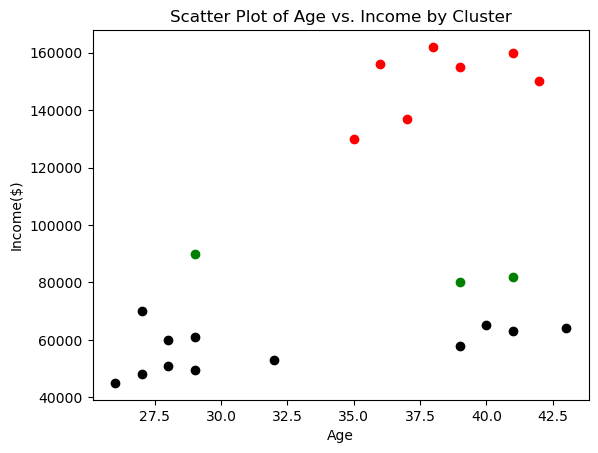

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'Age', 'Income($)', and 'cluster'

df1 = df[df.cluster == 0]  # Corrected: == 0, not =@
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green') # Corrected: df1, not dfi and string quotes around column name
plt.scatter(df2.Age, df2['Income($)'], color='red')   # Corrected: String quotes around column name and consistent syntax
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.xlabel("Age") # Added: Labels for better readability
plt.ylabel("Income($)")
plt.title("Scatter Plot of Age vs. Income by Cluster") # Added: Title for context

plt.show() # Added: To display the plot

In [22]:
income_data = df[['Income($)']]  # Double brackets create a DataFrame

scaler = MinMaxScaler()
scaler.fit(income_data)  # Fit the scaler to the 2D income data
df['Income($)'] = scaler.transform(income_data)  # Transform and update the column

df.head()


,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1


In [28]:
columns_to_scale = ['Age', 'Income($)']  # List of columns
data_to_scale = df[columns_to_scale]  # Create a DataFrame with the selected columns

scaler = MinMaxScaler()
scaler.fit(data_to_scale)  # Fit the scaler to both 'Age' and 'Income($)'

# Transform the data and update the original DataFrame
df[columns_to_scale] = scaler.transform(data_to_scale)

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [30]:
km= KMeans(n_clusters=3)
km
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

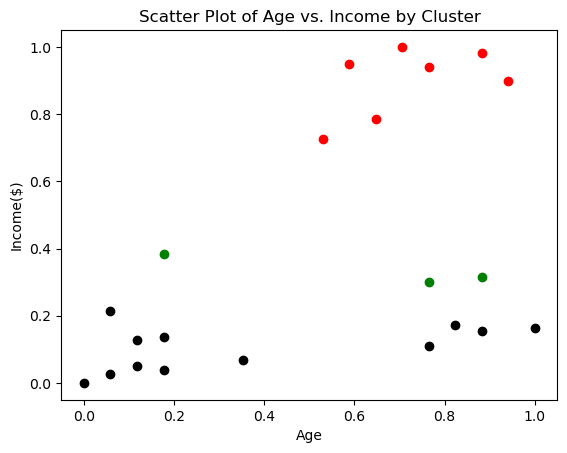

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame and it has columns 'Age', 'Income($)', and 'cluster'

df1 = df[df.cluster == 0]  # Corrected: == 0, not =@
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green') # Corrected: df1, not dfi and string quotes around column name
plt.scatter(df2.Age, df2['Income($)'], color='red')   # Corrected: String quotes around column name and consistent syntax
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.xlabel("Age") # Added: Labels for better readability
plt.ylabel("Income($)")
plt.title("Scatter Plot of Age vs. Income by Cluster") # Added: Title for context

plt.show() 

In [40]:
k_rng = range(1, 18)
sse = []

for k in k_rng:
    # Initialize KMeans with the correct number of clusters (k)
    km = KMeans(n_clusters=k, random_state=42)  # Add random_state for reproducibility
    
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

# Now 'sse' will contain the inertia values for each k
print(sse)

[5.434011511988176, 2.3456144914725936, 0.47507834985530945, 0.3698658919234831, 0.282940458716048, 0.23014252862240325, 0.2054876962752632, 0.14718536793995934, 0.13246345557512862, 0.12375328215020051, 0.08397026826698847, 0.06358767632907755, 0.04001212087968661, 0.030426552928992823, 0.023483008987844393, 0.018100337426484155, 0.011033819491365383]


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [42]:
sse

[5.434011511988176,
 2.3456144914725936,
 0.47507834985530945,
 0.3698658919234831,
 0.282940458716048,
 0.23014252862240325,
 0.2054876962752632,
 0.14718536793995934,
 0.13246345557512862,
 0.12375328215020051,
 0.08397026826698847,
 0.06358767632907755,
 0.04001212087968661,
 0.030426552928992823,
 0.023483008987844393,
 0.018100337426484155,
 0.011033819491365383]

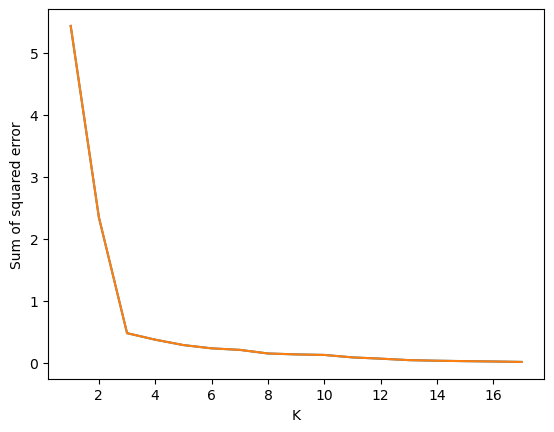

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()
